In [1]:
# load data
df <- read.table("housing.data", header = FALSE)
colnames(df) <- c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv")

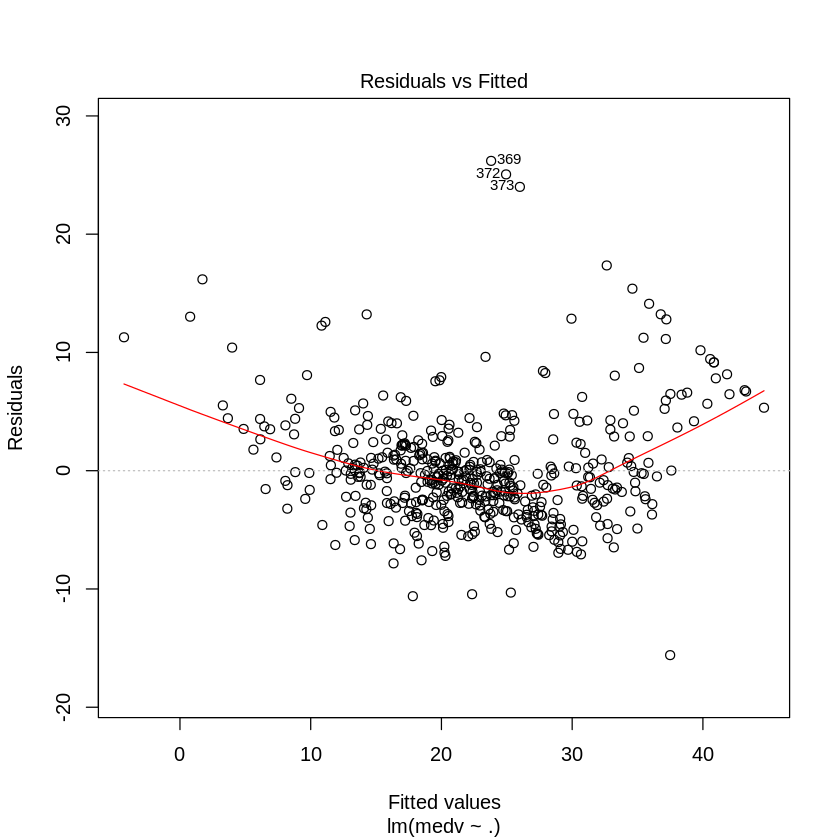

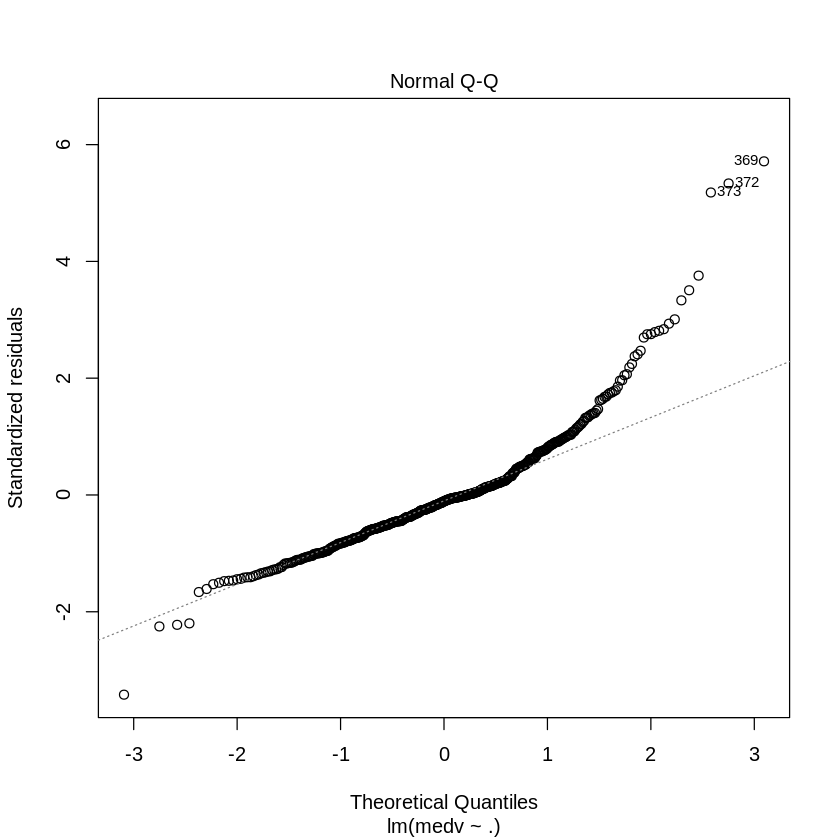

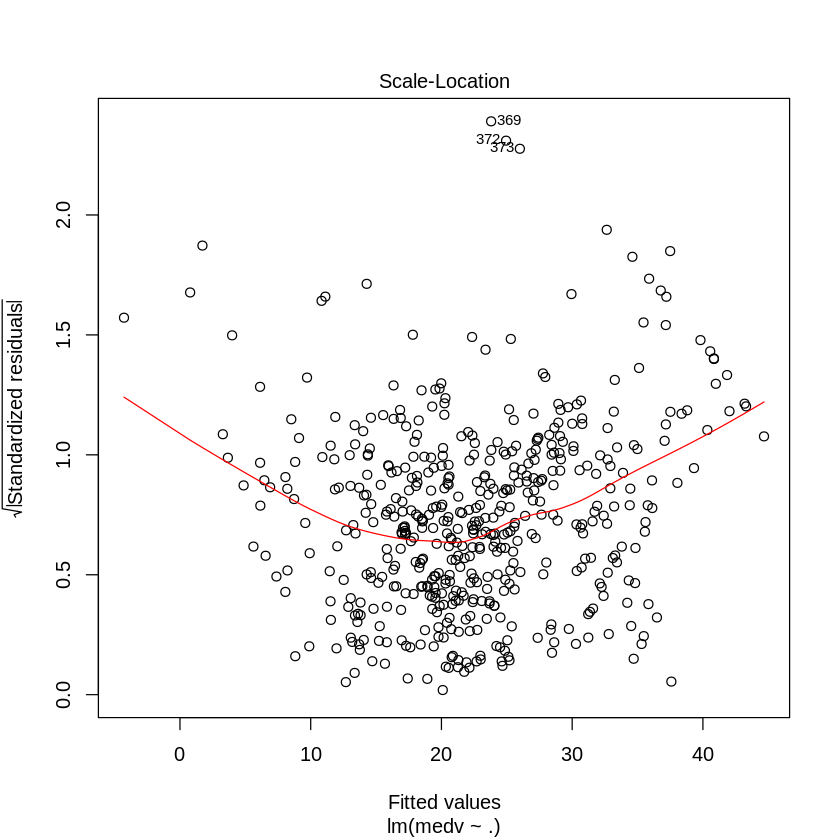

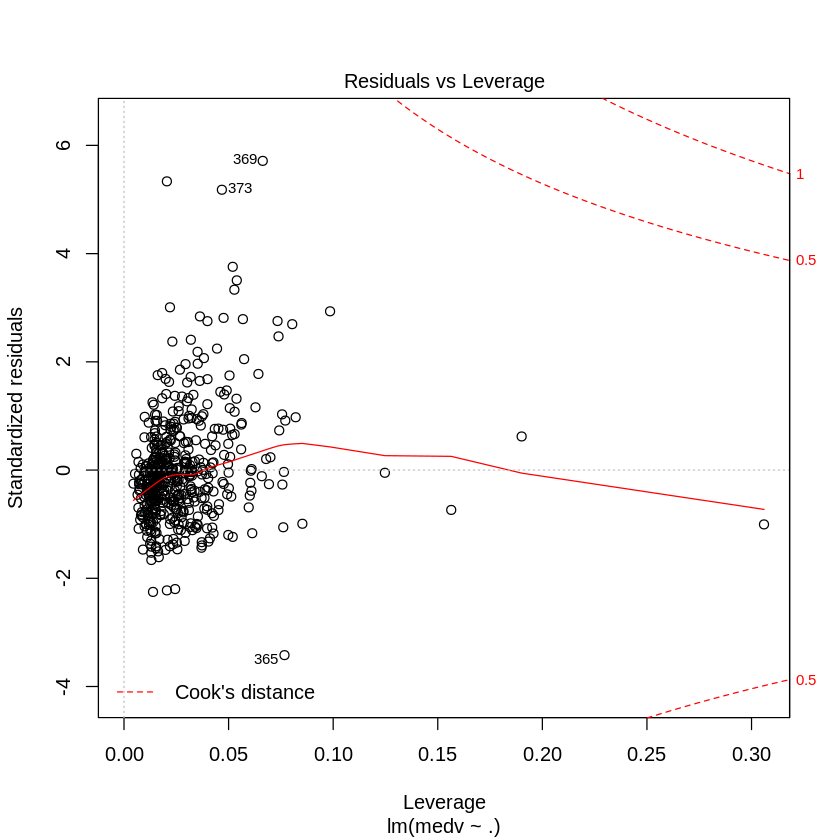

In [12]:
# generate regression model
model <- lm(medv ~ ., data=df)
plot(model)

In [3]:
# highest standardized residuals
rd <- abs(rstandard(model))
srd <- rd[order(-rd)]
head(srd)

369      372      373      370      413      365 
5.713855 5.335291 5.180330 3.756430 3.505841 3.420118

In [4]:
# highest leverage
hv <- hatvalues(model)
shv <- hv[order(-hv)]
head(shv)

381        419        406        411        366        156 
0.30595949 0.19010096 0.15643251 0.12470699 0.09851493 0.08527666

In [5]:
# highest cooks
cd <- cooks.distance(model)
scd <- cd[order(-cd)]
head(scd)

369        373        365        366        370        413 
0.16567369 0.09409651 0.06942966 0.06718425 0.05526255 0.05004117

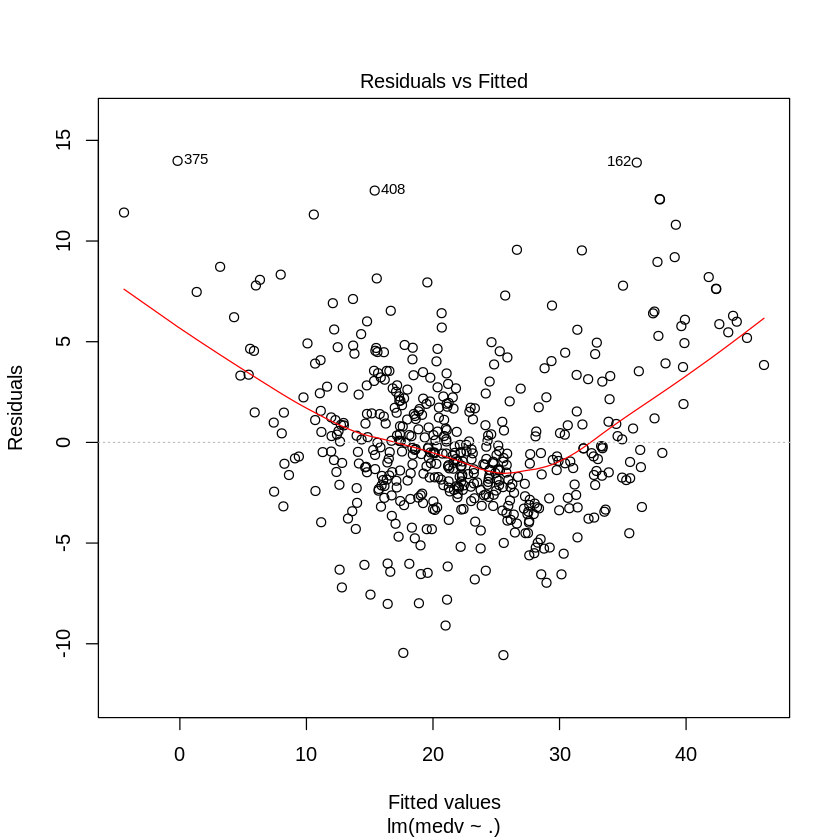

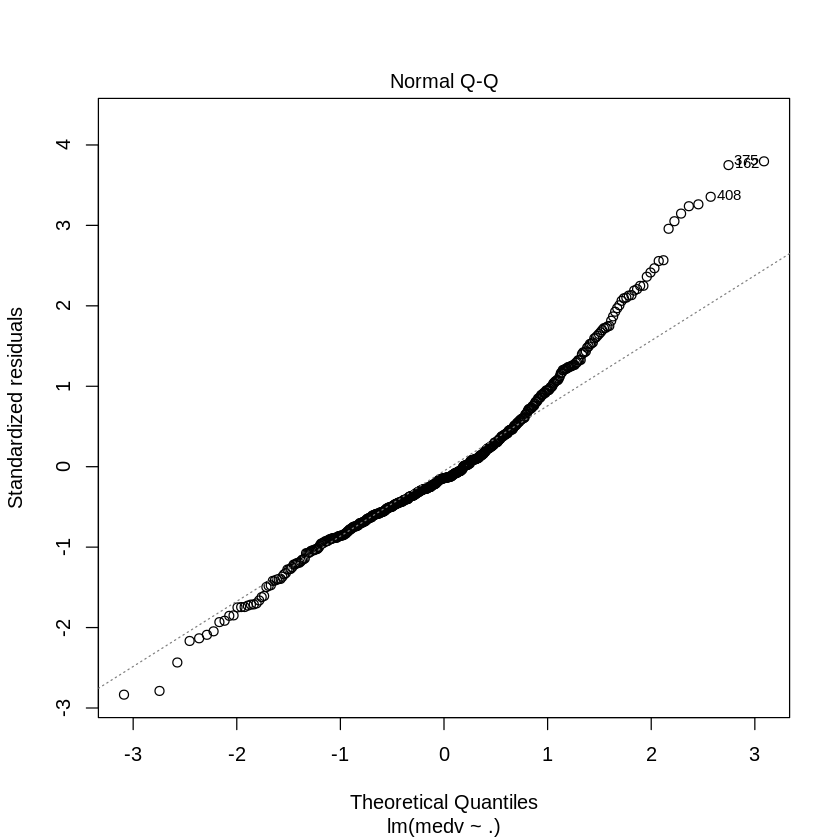

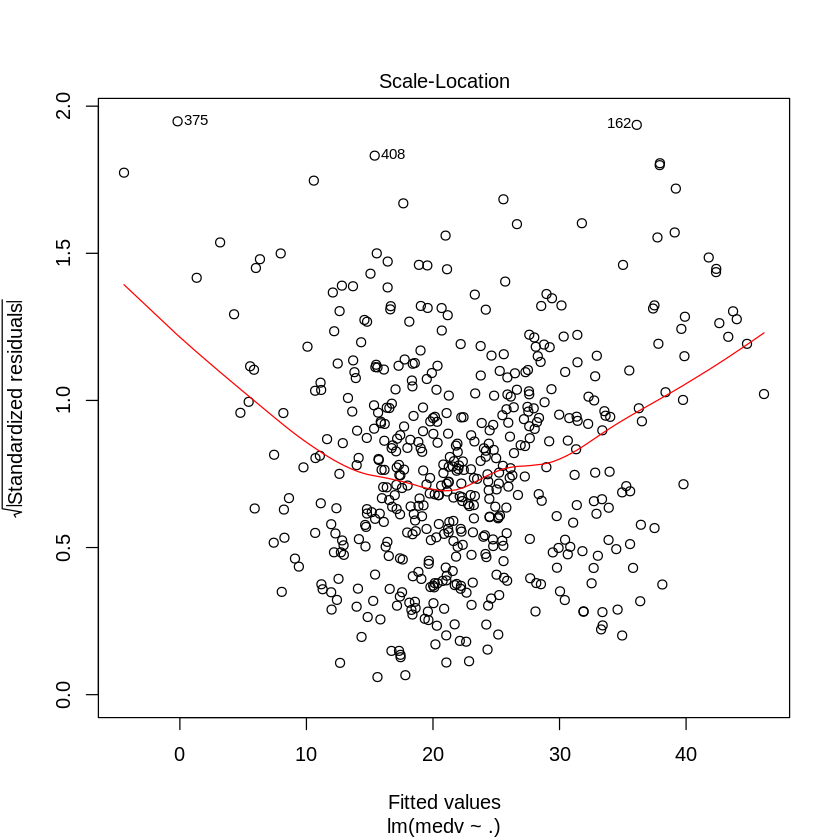

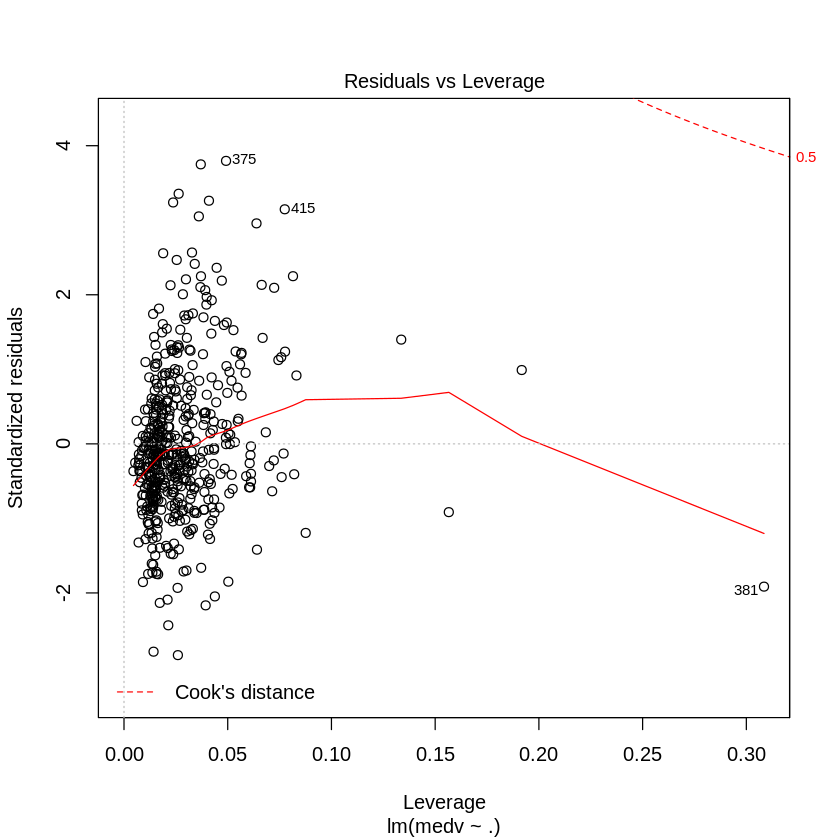

In [6]:
# remove outliers
trimmed <- df[-c(369, 372, 373, 370, 366, 368, 371, 413, 365), ]
model_trimmed <- lm(medv ~ ., data=trimmed)
plot(model_trimmed)

In [7]:
# boxcox
library(MASS)

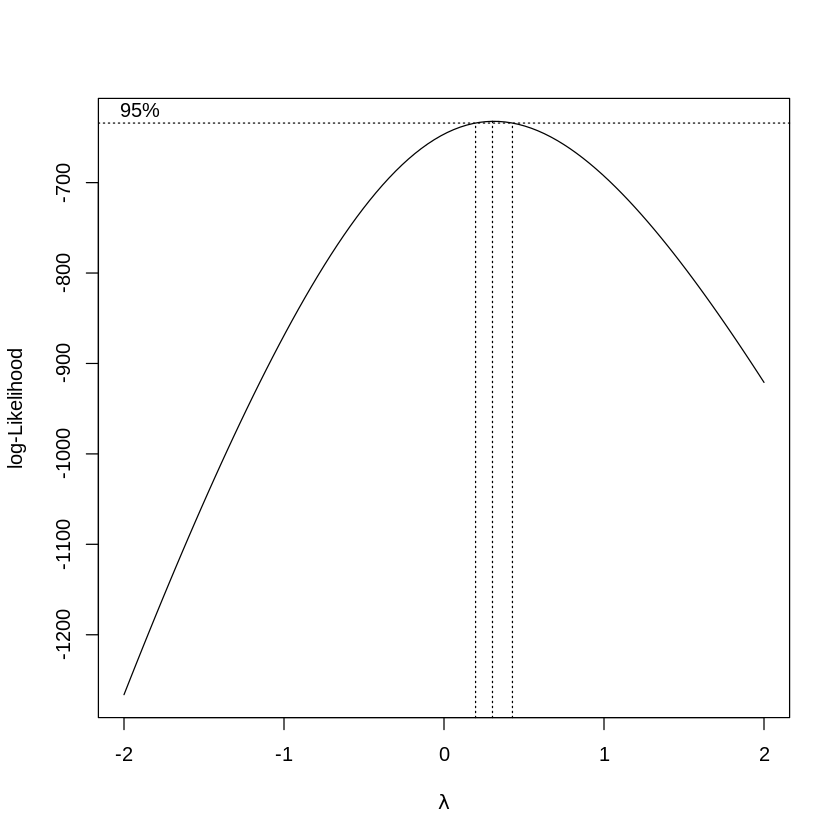

In [8]:
bc <- boxcox(model_trimmed)

In [9]:
lambda <- bc$x[which.max(bc$y)]
lambda

[1] 0.3030303

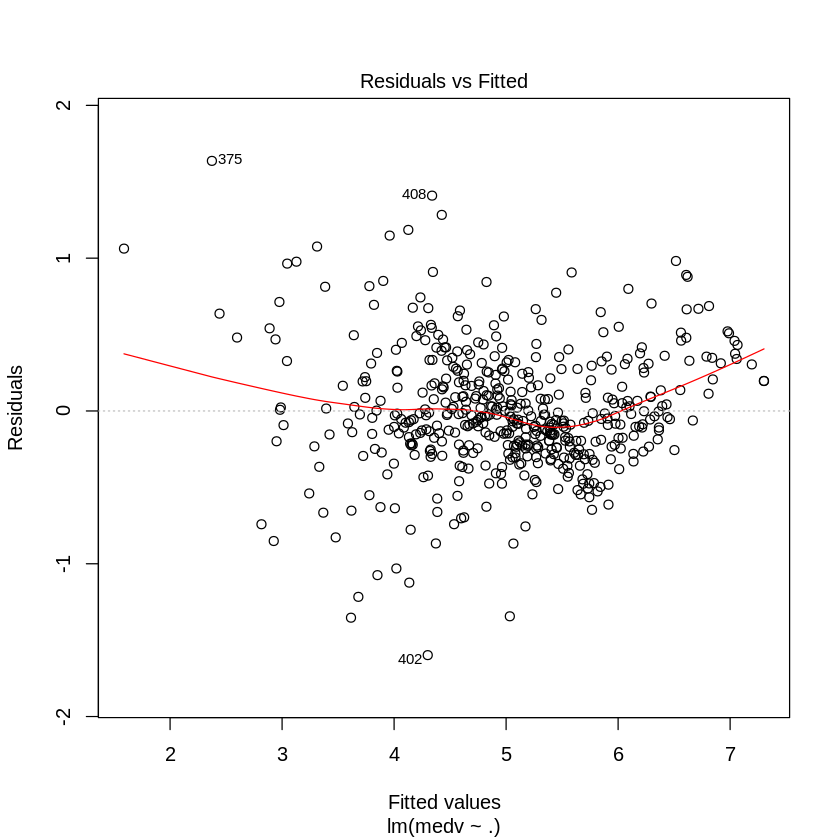

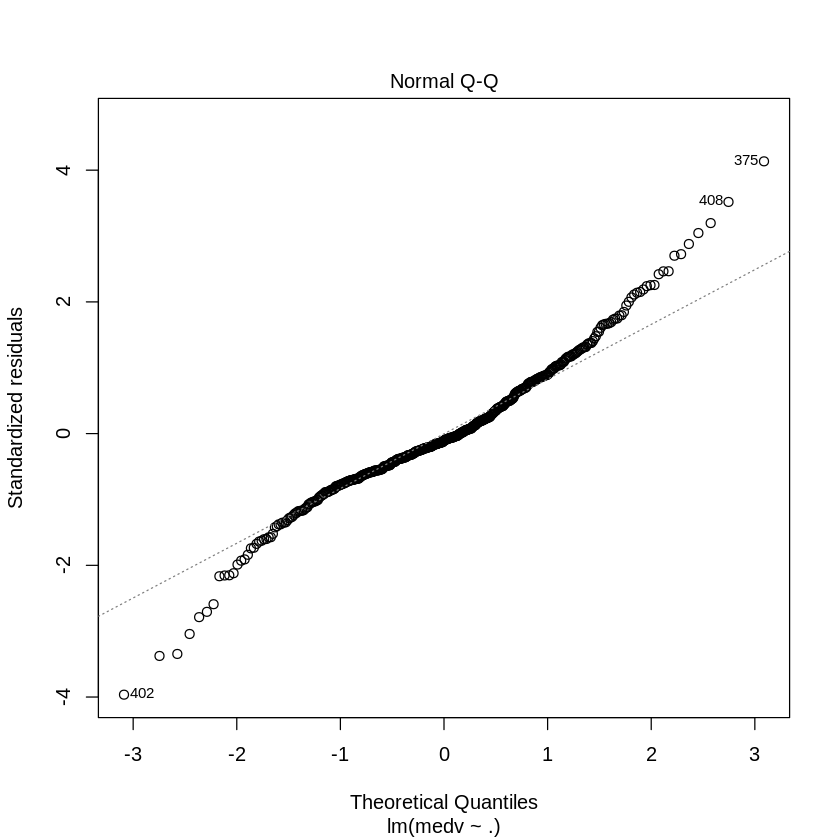

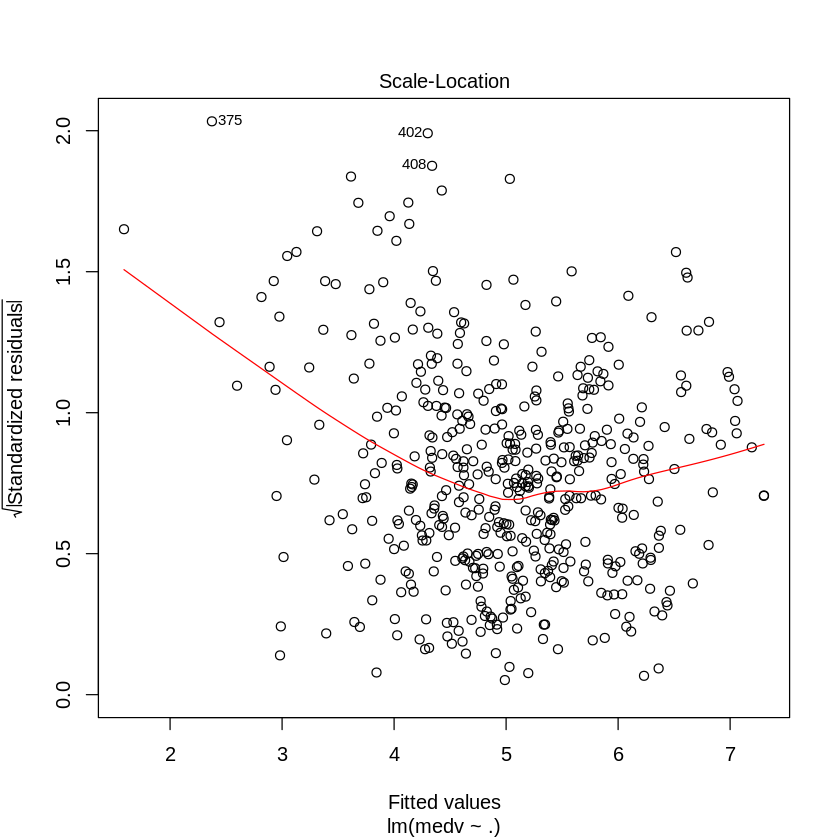

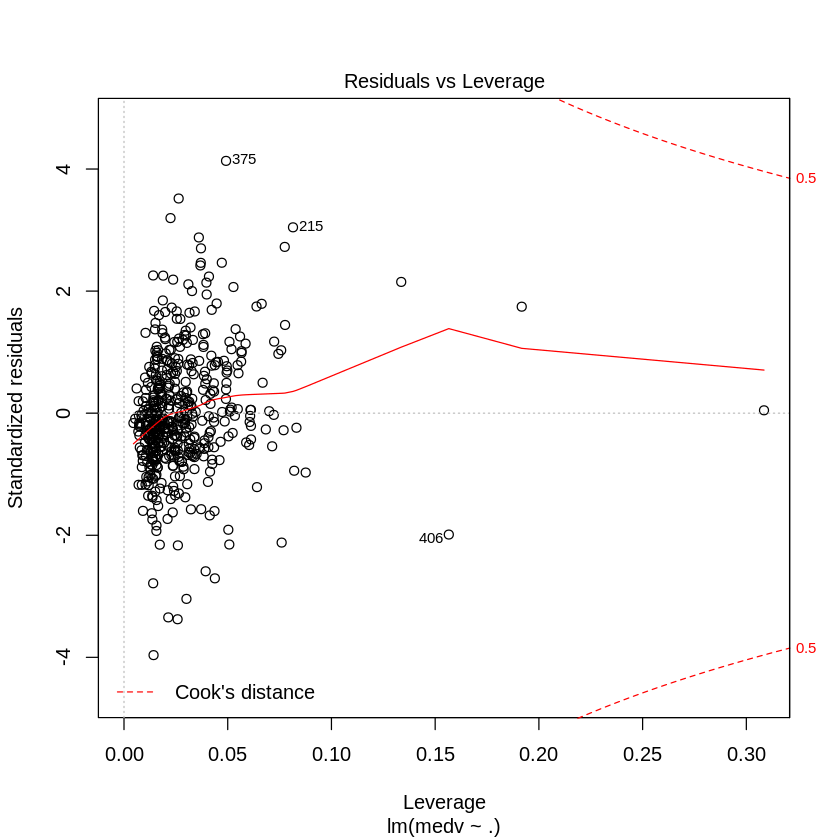

In [10]:
# transform using optimal lambda
transformed <-transform(trimmed, medv = (medv^(lambda) - 1)/lambda)
model_transformed <- lm(medv ~ ., data=transformed)
plot(model_transformed)

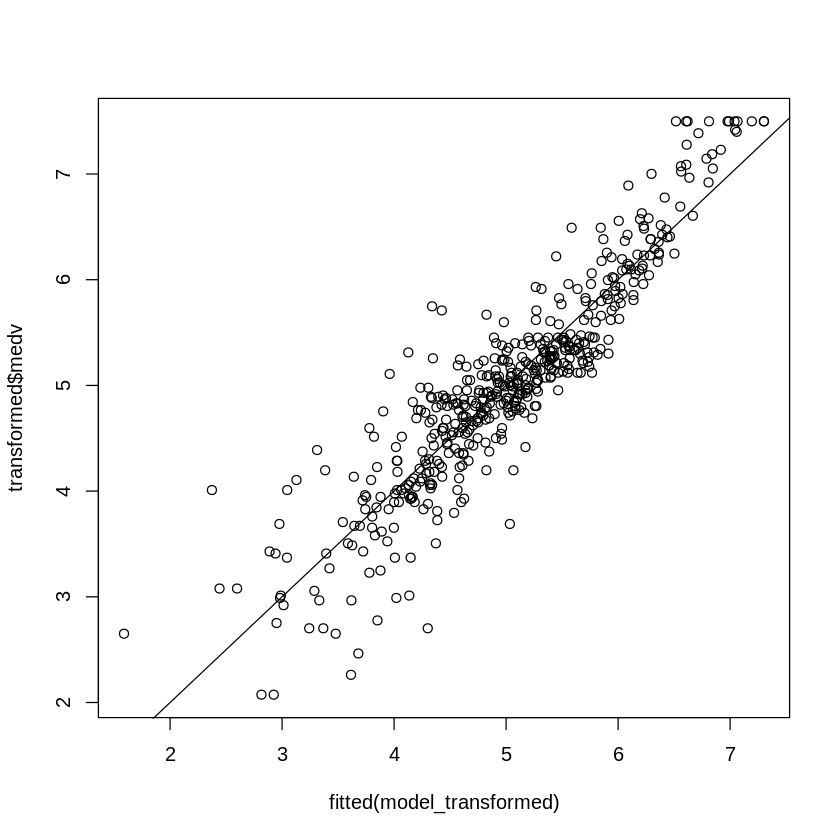

In [11]:
# fitted house price against true house price (transformed)
plot(fitted(model_transformed), transformed$medv)
abline(a=0, b=1)